In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 18 11:34:12 2019

THIS SCRIPT CREATES CONTOUR PLOTS OF PRECIPITATION COMPOSITES, AND CAN DO GRAPHICS
WHERE CONTOUR LINES OF ONE DATASET (E.G. PRECIP PERCENTAGE) OVERLAY CONTOUR COLOURS
OF ANOTHER DATASET (E.G. PRECIP TOTAL.)

@author: Nick
"""
import numpy as np
import netCDF4 as nc
from datetime import datetime
import matplotlib.dates as dt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import ticker, colors

import warnings
import cartopy as cart
from cartopy import crs as ccrs, feature as cfeature

#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

In [2]:
#==============================================================================

def plot_colour_map(colour_data, res, lats, lons, contour_intervals = None, map_underlay = False, gridres = 0, savefigure = False, file_name = None, show_plot = True):
    
    # Set up some utility scales of lat, lon, and the increments for the colour scale
    lat_vector = colour_data[1] # colour_data[1] and colour_data[2] are the lat and lon vectors
    lon_vector = colour_data[2] # from the netcdf data (i.e. xarray object).
    
    latall = np.meshgrid(lon_vector, lat_vector)[1]
    lonall = np.meshgrid(lon_vector, lat_vector)[0]

    scale_levels = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
    
    # This part opens the figure and axes objects, with a cartopy georeference instance.
    fig = plt.figure(figsize = (11, 8.5))
    ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree(central_longitude = (lons[0] + lons[1]) / 2))
    ax.set_extent([lons[0], lons[1], lats[0], lats[1]])
    
    # From here we add all the features that we want to our axes: coastlines, labels etc. and
    # the data to show.
    ax.set_title('Rainfall Critical Success Index PG vs R13')
    dataplot = ax.contourf(lonall, latall, colour_data[0], transform = ccrs.PlateCarree(), levels = scale_levels, cmap = plt.cm.YlGnBu)
    
    plt.colorbar(dataplot, orientation = 'horizontal') 
    
    if map_underlay:

        # Show the coastline
        ax.coastlines()

        # Mask out the ocean
        ax.add_feature(cart.feature.OCEAN, zorder=1, edgecolor='k')
        gl = ax.gridlines(draw_labels = True, linewidth = 2, color = 'gray', alpha = 0.5, linestyle = '--')
    
    #- Call show and savefig:
    if savefigure:
        
        plt.savefig(file_name, format = 'png')
        
    if show_plot:
        
        plt.show()
        
    plt.close('all')
    
#==============================================================================

In [3]:
# Load the netcdf files and extract the data
data_path = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Output_Data/R13vsPG/'
save_path = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Output_Data/R13vsPG/'

#reanalysis = 'ERA5'

#n_years = 40

rain_obj_1 = nc.Dataset(data_path + 'precip_r13_matches.nc','r',format = 'NETCDF4')
rain_obj_2 = nc.Dataset(data_path + 'precip_r13_only.nc','r',format = 'NETCDF4')
rain_obj_3 = nc.Dataset(data_path + 'precip_pg_only.nc','r',format = 'NETCDF4')

rain1 = rain_obj_1['precip'][:] 
rain2 = rain_obj_2['precip'][:]
rain3 = rain_obj_3['precip'][:]

In [4]:
# This part sets up a filter of the rain data, to remove any of the super-
# low values from the dataset (e.g. over the ocean, desert) that would skew
# the appearance of the data that we really want to show (i.e. the rainfall
# over the inhabited areas of Southern Australia
nrows = np.shape(rain1)[0]
ncols = np.shape(rain1)[1]

row_range = np.arange(0,nrows)
col_range = np.arange(0,nrows)

for r in row_range:
    for c in col_range:
        
        if rain1[r,c] < 0.1:
            
            rain1[r,c] = np.nan
            
        if rain2[r,c] < 0.1:
            
            rain2[r,c] = np.nan
            
        if rain3[r,c] < 0.1:
            
            rain3[r,c] = np.nan

lats = rain_obj_1['lat'][:]
lons = rain_obj_1['lon'][:]

# Compute the rainfall csi and attach the lat and lon scales to feed 
# into the plotting function
rain_csi = rain1 / (rain1 + rain2 + rain3)

rain_csi = (rain_csi, lats, lons)
rain_csi_pg = rain_csi

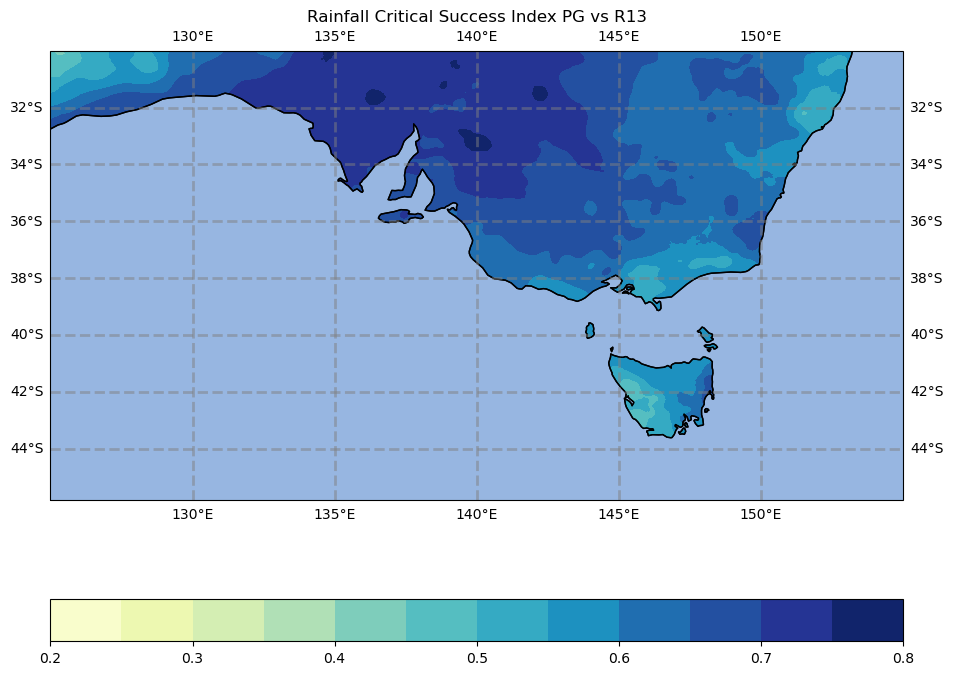

In [9]:
# Plot the data with or without a map here, and save the figure
plot_colour_map(rain_csi_pg, 0.5, (-30, -45), (125, 155), map_underlay = True, gridres = 2.5, savefigure = False, file_name = save_path + 'precip_csi_pvvsr13.png')

In [7]:
# close the xarray objects for good practice
rain_obj_1.close()
rain_obj_2.close()
rain_obj_3.close()

In [8]:
# Load the netcdf files and extract the data
data_path = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Output_Data/R13vsMU/'
save_path = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Output_Data/R13vsMU/'

#reanalysis = 'ERA5'

#n_years = 40

rain_obj_1 = nc.Dataset(data_path + 'precip_r13_matches.nc','r',format = 'NETCDF4')
rain_obj_2 = nc.Dataset(data_path + 'precip_r13_only.nc','r',format = 'NETCDF4')
rain_obj_3 = nc.Dataset(data_path + 'precip_mu_only.nc','r',format = 'NETCDF4')

rain1 = rain_obj_1['precip'][:] 
rain2 = rain_obj_2['precip'][:]
rain3 = rain_obj_3['precip'][:]

In [10]:
# This part sets up a filter of the rain data, to remove any of the super-
# low values from the dataset (e.g. over the ocean, desert) that would skew
# the appearance of the data that we really want to show (i.e. the rainfall
# over the inhabited areas of Southern Australia
nrows = np.shape(rain1)[0]
ncols = np.shape(rain1)[1]

row_range = np.arange(0,nrows)
col_range = np.arange(0,nrows)

for r in row_range:
    for c in col_range:
        
        if rain1[r,c] < 0.1:
            
            rain1[r,c] = np.nan
            
        if rain2[r,c] < 0.1:
            
            rain2[r,c] = np.nan
            
        if rain3[r,c] < 0.1:
            
            rain3[r,c] = np.nan

lats = rain_obj_1['lat'][:]
lons = rain_obj_1['lon'][:]

# Compute the rainfall csi and attach the lat and lon scales to feed 
# into the plotting function
rain_csi = rain1 / (rain1 + rain2 + rain3)

rain_csi = (rain_csi, lats, lons)
rain_csi_mu = rain_csi

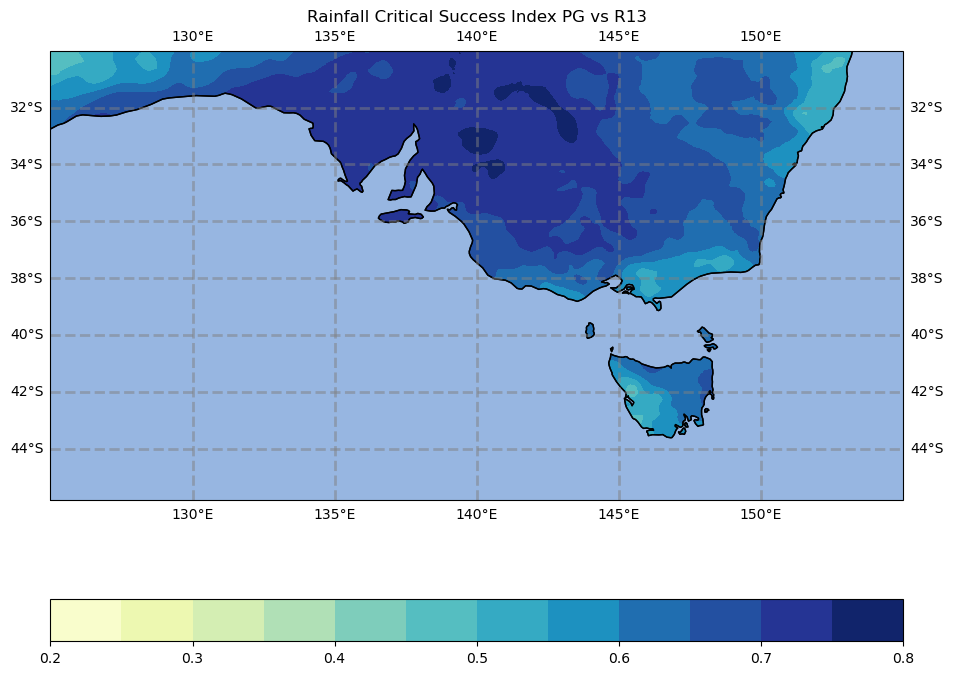

In [11]:
# Plot the data with or without a map here, and save the figure
plot_colour_map(rain_csi_mu, 0.5, (-30, -45), (125, 155), map_underlay = True, gridres = 2.5, savefigure = False, file_name = save_path + 'precip_csi_muvsp06.png')

In [12]:
# close the xarray objects for good practice
rain_obj_1.close()
rain_obj_2.close()
rain_obj_3.close()

In [16]:
#==============================================================================

def plot_colour_map(colour_data, res, lats, lons, contour_intervals = None, map_underlay = False, gridres = 0, savefigure = False, file_name = None, show_plot = True):
    
    # Set up some utility scales of lat, lon, and the increments for the colour scale
    lat_vector = colour_data[1] # colour_data[1] and colour_data[2] are the lat and lon vectors
    lon_vector = colour_data[2] # from the netcdf data (i.e. xarray object).
    
    latall = np.meshgrid(lon_vector, lat_vector)[1]
    lonall = np.meshgrid(lon_vector, lat_vector)[0]

    scale_levels = [-0.08, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08]
    
    # This part opens the figure and axes objects, with a cartopy georeference instance.
    fig = plt.figure(figsize = (11, 8.5))
    ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree(central_longitude = (lons[0] + lons[1]) / 2))
    ax.set_extent([lons[0], lons[1], lats[0], lats[1]])
    
    # From here we add all the features that we want to our axes: coastlines, labels etc. and
    # the data to show.
    ax.set_title('Rainfall Critical Success Index MU - PG')
    dataplot = ax.contourf(lonall, latall, colour_data[0], transform = ccrs.PlateCarree(), levels = scale_levels, cmap = plt.cm.bwr)
    
    plt.colorbar(dataplot, orientation = 'horizontal') 
    
    if map_underlay:

        # Show the coastline
        ax.coastlines()

        # Mask out the ocean
        ax.add_feature(cart.feature.OCEAN, zorder=1, edgecolor='k')
        gl = ax.gridlines(draw_labels = True, linewidth = 2, color = 'gray', alpha = 0.5, linestyle = '--')
    
    #- Call show and savefig:
    if savefigure:
        
        plt.savefig(file_name, format = 'png')
        
    if show_plot:
        
        plt.show()
        
    plt.close('all')
    
#==============================================================================

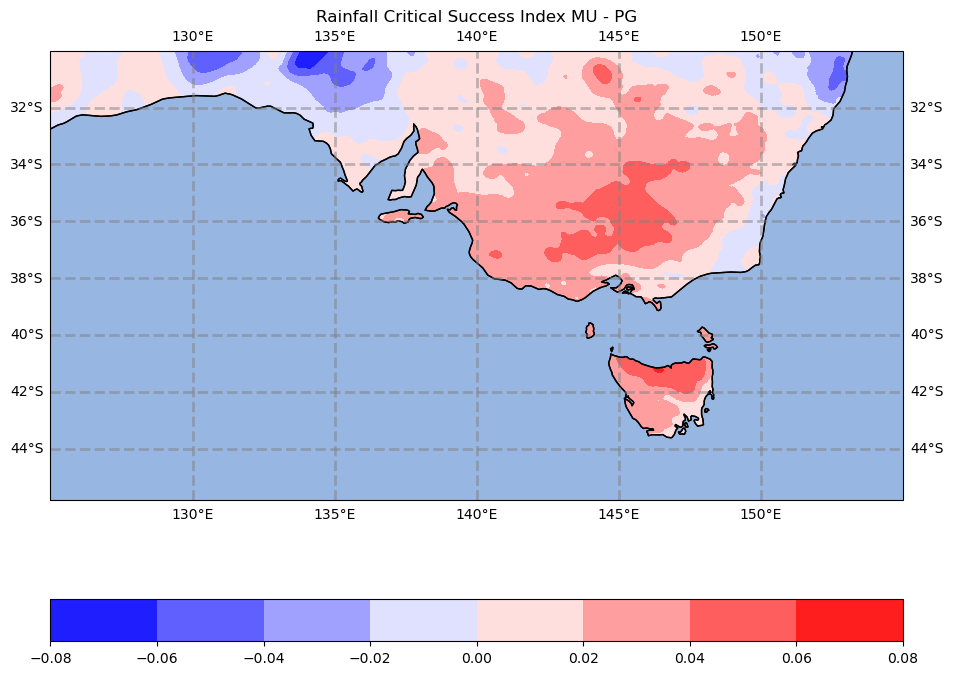

In [18]:
# Compute and plot the difference in rcsi for the PG and MU schemes here
rain_csi_diff = (rain_csi_mu[0] - rain_csi_pg[0],rain_csi_mu[1] ,rain_csi_mu[2])
plot_colour_map(rain_csi_diff, 0.5, (-30, -45), (125, 155), map_underlay = True, gridres = 2.5, savefigure = True, file_name = save_path + 'precip_csi_mu-pg.png')

In [ ]:
# Load the netcdf files and extract the data
data_path = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Output_Data/P06vsMU/'
save_path = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Output_Data/P06vsMU/'

#reanalysis = 'ERA5'

#n_years = 40

rain_obj_1 = nc.Dataset(data_path + 'precip_p06_matches.nc','r',format = 'NETCDF4')
rain_obj_2 = nc.Dataset(data_path + 'precip_p06_only.nc','r',format = 'NETCDF4')
rain_obj_3 = nc.Dataset(data_path + 'precip_mu_only.nc','r',format = 'NETCDF4')

rain1 = rain_obj_1['precip'][:] 
rain2 = rain_obj_2['precip'][:]
rain3 = rain_obj_3['precip'][:]

In [ ]:
# This part sets up a filter of the rain data, to remove any of the super-
# low values from the dataset (e.g. over the ocean, desert) that would skew
# the appearance of the data that we really want to show (i.e. the rainfall
# over the inhabited areas of Southern Australia
nrows = np.shape(rain1)[0]
ncols = np.shape(rain1)[1]

row_range = np.arange(0,nrows)
col_range = np.arange(0,nrows)

for r in row_range:
    for c in col_range:
        
        if rain1[r,c] < 0.1:
            
            rain1[r,c] = np.nan
            
        if rain2[r,c] < 0.1:
            
            rain2[r,c] = np.nan
            
        if rain3[r,c] < 0.1:
            
            rain3[r,c] = np.nan

lats = rain_obj_1['lat'][:]
lons = rain_obj_1['lon'][:]

# Compute the rainfall csi and attach the lat and lon scales to feed 
# into the plotting function
rain_csi = rain1 / (rain1 + rain2 + rain3)

rain_csi = (rain_csi, lats, lons)

In [ ]:
# Plot the data with or without a map here, and save the figure
plot_colour_map(rain_csi, 0.5, (-30, -45), (125, 155), map_underlay = True, gridres = 2.5, savefigure = False, file_name = save_path + 'precip_csi_muvsp06.png')